# Linear Regression

- Now we will actually start fitting and exploring one of the most basic, but useful, models in machine learning.
- There are 4 parts to (most) machine learning algorithms

1. Data (our features $x_1$ to $x_n$)
2. A function (linear regression)
3. A way to measure how right or wrong that function is (mean squared error)
4. A way to improve that function (stochastic gradient descent)

## 1. Our Data

- Our data is simply our features.  For the Melbourne data...



In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import contextlib
from PIL import Image

df = pd.read_csv('melb_data.csv')
df = df[['Rooms', 'Landsize', 'Price']]
df.head(5)

,Rooms,Landsize,Price
0,2,202.0,1480000.0
1,2,156.0,1035000.0
2,3,134.0,1465000.0
3,3,94.0,850000.0
4,4,120.0,1600000.0


- X represents the rows "stacked" into a matrix.  Upper case values represent matrices and lower case, vectors
- Each feature is represented by a column of the matrix X
- Each row represents single observation (property in the case of the Melbourne data)

In [150]:
X = df[['Rooms', 'Landsize']]

y represents our output vector

In [151]:
y = df['Price']


Lower case x is a single row

In [152]:
x = X.iloc[0,:]
x

Rooms         2.0
Landsize    202.0
Name: 0, dtype: float64

Individual values are represented by $x_1$, $x_2$, etc.  $x_0$ stands in for the bias or the intercept and is always 1

In [153]:
x1 = X.iloc[0,0]
x2 = X.iloc[0,1]
x0 = 1

## 2. Our Model

- The simplest model is a linear regression which is a set of weights and biases.  Each feature in your data set is multiplied by a corresponding weight and the results are summed together with a bias (intercept).  These give the output of your regression model
    - ### $\hat{y} = \theta_0 + \theta_1x_1 + \dotsb + \theta_nx_n$ where:
    - $\hat{y}$ is the predicted value
    - $n$ is the number of features (columns in your data set)
    - $x_i$ is the ith feature value
    - $\theta_j$ is the jth model parameter, including the bias term $\theta_0$ (where $x_0$ is just 1) and the feature weights $\theta_0, \theta_1, \dotsb, \theta_n $

- We can also "vectorize" or write this model for a single observation in a form using vectors
    - ### $\hat{y} = h_{\theta}(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x}$ where:
    - $h_\theta$ is the hypothesis function, using the model parameters $\mathbf{\theta}$
    - $\mathbf{x}$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
    - $\mathbf{\theta} \cdot \mathbf{x}$ is the dot product of the vectors $\mathbf{\theta}$ and $\mathbf{x}$, which is equal to $\theta_0 + \theta_1x_1 + \dotsb + \theta_nx_n$

- Let's add in a column of 1s to our data to stand in for the biases
### **⚠️ Warning**: When we eventually fit a model with sklearn, we will not have to add a bias in, the model will do this for us separately, I am just doing this now, for illustration purposes.

In [154]:
X = np.append(X, np.ones(X.shape[0]).astype(int).reshape(-1, 1), 1)
X_b = pd.DataFrame(X,columns= list(df.columns[:-1])+ ['Bias'], index=df.index)
X_b

,Rooms,Landsize,Bias
0,2.0,202.0,1.0
1,2.0,156.0,1.0
2,3.0,134.0,1.0
3,3.0,94.0,1.0
4,4.0,120.0,1.0
...,...,...,...
13575,4.0,652.0,1.0
13576,3.0,333.0,1.0
13577,3.0,436.0,1.0
13578,4.0,866.0,1.0


- Let's randomly initialize some weights

In [155]:
# Random weights
w = np.random.rand(X.shape[1])
w

array([0.43742243, 0.88982763, 0.68219274])

- And try our weights out

In [156]:
x = X[0,:]
np.dot(x, w)

181.30221796273187

- And the actual value?

In [157]:
y[0] # Pretty awful!!!

1480000.0

# 3. Our Loss Function

- We need a way to measure how right or wrong we are
- We will use mean squared error (instead of root mean squared error)
    - ### $\text{MSE}(\mathbf{X},h_{\theta}) = \frac{1}{m}\sum_{i=1}^m (\mathbf{\theta}^T\mathbf{x}^{(i)}-y^{(i)})^2$
    - This is just the average squared distance between the actual values $y$ and the fitted values $\theta^T\mathbf{x}$
        - The distance between our actual y values and our fitted values are called our residuals.  If we have our line of best fit, the sum of our residuals will equal 0
        - We use $\theta^T$ because $\theta$ is a column vector and we need a row vector to multiply by $\mathbf{x}$
        - To get fitted values for all rows at once we would evaluate $\mathbf{X}\theta^T$ ($\mathbf{X}$ is m x n and $\theta^T$ is n x 1...the result is m x 1)

In [158]:
def get_loss_1d(x, y, weights):
    return (np.dot(x,weights)-y)**2

get_loss_1d(x, y[0], w) # this is also awful

2189863378305.3247

In [159]:
# sqrt is in the same units as original y and is root squared mean error
np.sqrt(get_loss_1d(x, y[0], w))

1479818.6977820373

In [160]:
def get_loss_2d(X, y, weights):
    return np.sum(((X @ weights.T)-y)**2)/X.shape[0]

np.sqrt(get_loss_2d(X[0,:].reshape(1,3), y[0], w))

1479818.6977820373

# 4. Improve Our Loss (Minimize it!)

- We need a way to find the minimal loss
- For linear regression there exists a "closed-form" solution which can be solved with linear algebra and inverses (a.k.a. Normal Equation)
- ### $\hat{\theta} = \mathbf{(X^TX)^{-1}X^T}y$

In [161]:
w = (np.linalg.inv(X.T @ X) @ X.T @ y)
w

array([3.31778464e+05, 3.96835645e+00, 9.87039362e+04])

In [162]:
y[0]

1480000.0

In [163]:
get_loss_1d(x, y[0], w)

513999419686.0513

In [164]:
np.sqrt(get_loss_1d(x, y[0], w)) # about half of what of what we had originally

716937.5284402758

In [165]:
np.sqrt(get_loss_2d(X[0,:].reshape(1,3), y[0], w))

716937.5284402758

# With statsmodels or sklearn

- This is done easily with statsmodels or sklearn

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

linear_regression = LinearRegression(fit_intercept=False)
reg = linear_regression.fit(X,y)
print(reg.coef_,reg.intercept_)

[3.31778464e+05 3.96835645e+00 9.87039362e+04] 0.0


In [167]:
reg.predict(X)

array([ 763062.47155957,  762879.92716296, 1094571.0869851 , ...,
       1095769.53063241, 1429254.38756906, 1427254.33591925])

In [168]:
linear_regression = LinearRegression()
reg = linear_regression.fit(X[:,:2], y)
print(reg.coef_,reg.intercept_)

[3.31778464e+05 3.96835645e+00] 98703.93622902606


In [169]:
y_true = y[0]
y_pred = reg.predict(X[:,:2])[0]
y_pred

763062.4715597106

In [170]:
reg.predict(X[:,:2])

array([ 763062.47155971,  762879.92716307, 1094571.0869852 , ...,
       1095769.53063274, 1429254.38756975, 1427254.33591955])

In [171]:
root_mean_squared_error([y_true], [y_pred])

716937.5284402894

In [172]:
y_true = y
y_pred = reg.predict(X[:,:2])
root_mean_squared_error(y_true, y_pred)

554649.9944640205

# Linear Regression - Statistics

- There is a probability value assigned to the whole regression
    - This gives the probability of rejecting the null hypothesis all the weights are equal to 0
- There is a probability value or p-value associated with each weight as well
    - This gives the probability of rejecting the null hypothesis that each weight is equal to 0
- What can we use these p-values for?
    - Stepwise regression

In [173]:
#! pip install patsy
#!python -m pip install -i https://pypi.anaconda.org/scientific-python-nightly-wheels/simple statsmodels --upgrade --use-deprecated=legacy-resolver
import statsmodels.api as sm

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     2230.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:18:24   Log-Likelihood:            -1.9888e+05
No. Observations:               13580   AIC:                         3.978e+05
Df Residuals:                   13577   BIC:                         3.978e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.318e+05   4982.335     66.591      0.0

# Linear Regression – $R^2$

- $R^2$ (R squared) is a measure of the quality of your linear regression
- Is a measure of the amount of variation in the y variable explained by the x variables

- We can decompose the total sum of squared error of our data
    - SSTO (sum of squares total): $\sum (y_i-\bar{y})^2$ - distance between our y values and the mean of y.  
    - SSR (sum of squares regression): $\sum (\hat{y_i}-\bar{y})^2$ - distance between our fitted values and the mean - we want to maximize this value with respect to the total error (SSTO)
    - SSE (sum of squares error): $\sum (y_i-\hat{y})^2$ - distance between our fitted values and the actual values - we want to minimize this value with respect to the total error

- These three have the relationship that SSTO = SSR + SSE
- We calculate $R^2 = \frac{\text{SSR}}{\text{SSTO}}$


# Linear Regression - Interpretation of Coefficients

- Each weight or coefficient is the amount that the output changes when the x-value associated with that weight increases by 1 unit.
- Example: our linear regression for our real estate example is approximately
    - $\hat{y} = 331,778*\text{Rooms} + 4*\text{Landsize} + 98,704$
- How might we interpret these?
- For multiple linear regression the coefficients have the same interpretation, but with a small caveat (hold all other x values the same)
    - What might the problem with this caveat be?


# Gradient Descent

- What if there was no closed form solution?  There is no closed form solution for the coefficients of a logistic regression.
- We could guess, but there is a better way
- We use gradient descent.  This approach is also used in logistic regression and a similar approach is used for training neural networks
- Basic Idea:
    - Take the derivative of the loss function with respect to each weight $\theta$.
    - This will give you a derivative for each weight, which you will put in a vector.
    - This gradient vector will give you the opposite direction of the smallest loss
        - The loss for linear regression is convex so it has 1 global minimum
        - This is NOT the case for neural networks, you may have local minimum which are sometimes hard to escape
    - Adjust the weights by this gradient vector (by subtracting to go "downhill") times a learning rate (hyperparameter) for a number of steps (epochs) until desired loss has been achieved

## Gradient Vector

- The gradient with respect to each weight is given as

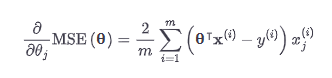

and putting all these in one vector will result in 

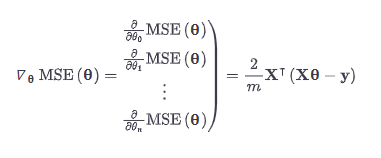

you update the weights by ... 

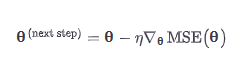

### Batch Gradient Descent

- For batch gradient descent or full batch gradient descent, m is equal to the entire data set
- This will take up more time because you have to iterate over the entire data set, but will approach the optimal solution smoothly because at each step it will optimally move in the direction of the best weights

### Mini-Batch Gradient Descent

- For mini-batch you select a random sample.  m is equal to the size of your sample (batch size)
- Faster, but more erratic in how it approaches the optimal solution

### Stochastic (Random) Gradient Descent

- For stochastic gradient descent m is equal to 1.
- Fastest, but most erratic in the way it approaches the optimal solution

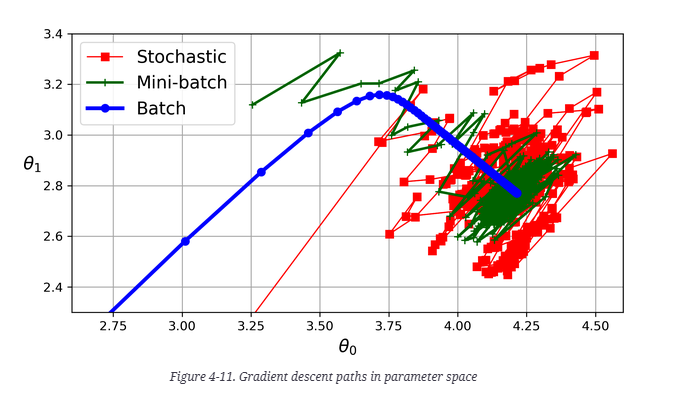

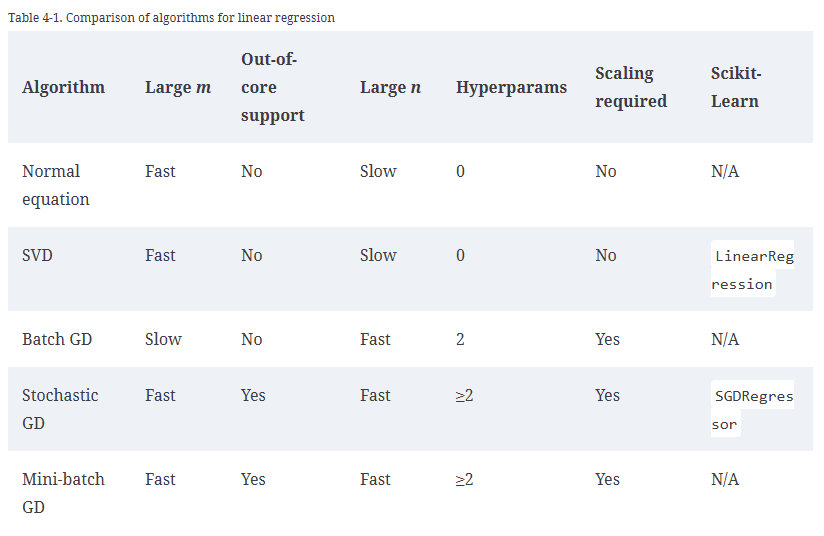

## Learning Rate

- The learning rate is a hyperparameter you must set.

### Just Right

- If your learning rate (often times called eta or $\eta$) is just right, you will approach the lowest loss in just the right manner.

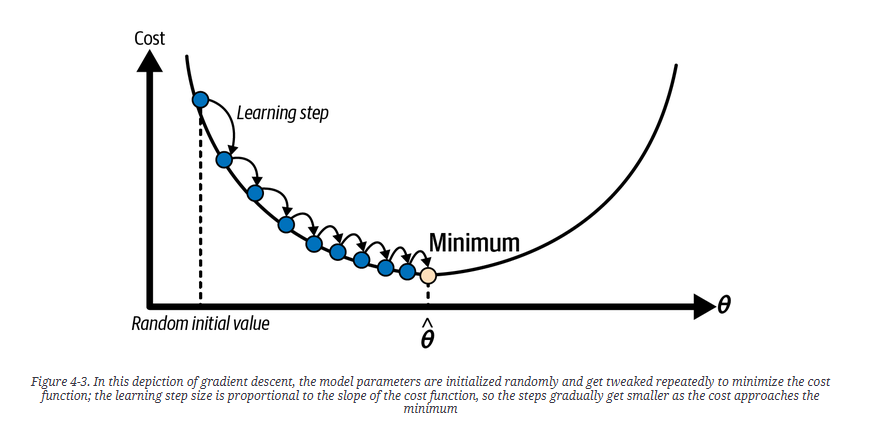

### Too Small

- If your learning rate is too small, you will take forever to approach the correct value

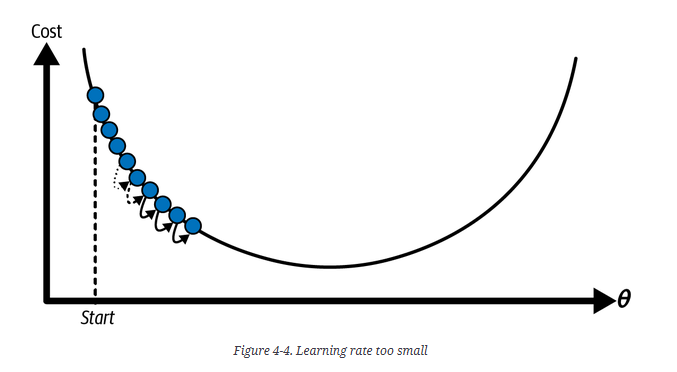

### Too Large

- If your learning rate is too big, you will skip over the right value

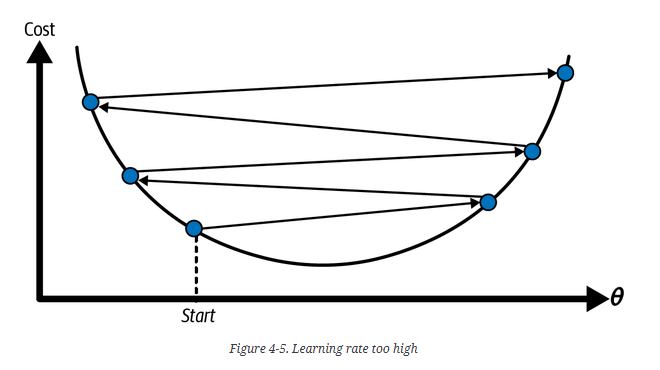

## Minimums

### Global and Local

- Luckily the linear regression has only one global minimum, but some models (neural networks) have local and global minimum, which means you might get trapped, if you don't set the right parameters.
- Stochastic gradient descent and the manner in which it skips around, can actually be helpful for getting out of local minimum

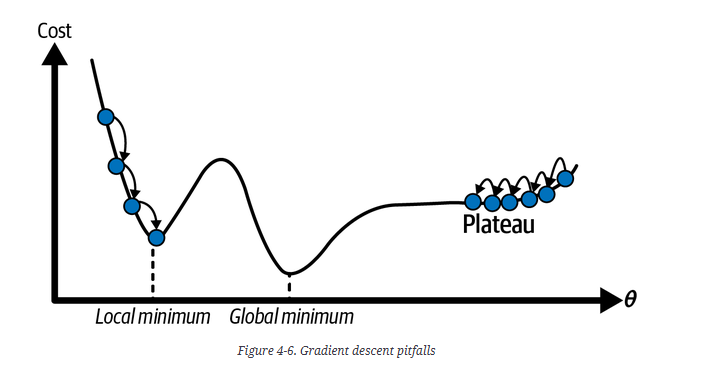

### With and Without Scaling

- Since your variables (in our case, Rooms and Landsize) can have such different scales, this means the loss curve can be "squashed" much more in one direction than another and take longer converge in that direction.
- It works best to scale the data in this case in order to help fitting.

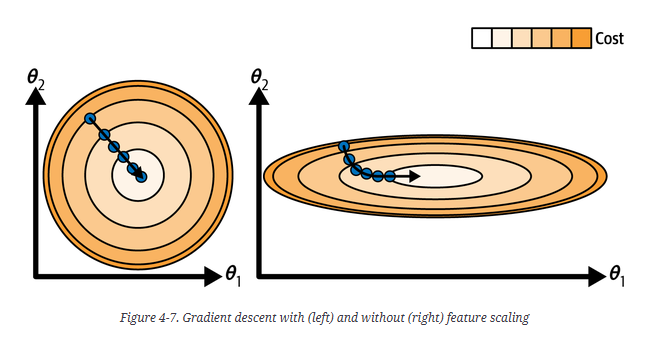

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    max_iter=1000000,        # Train for up to 1 million iterations
    eta0=0.5,                # Initial learning rate
    fit_intercept=True,      # Includes an intercept term (bias)
    learning_rate='invscaling', # The learning rate decreases over time
    loss='squared_error'     # Uses Mean Squared Error (MSE) as the loss function
)

# sgd_reg = SGDRegressor(max_iter=1000000, eta0=0.5, fit_intercept=True, learning_rate='invscaling', loss='squared_error')
sgd_reg.fit(X[:, :2], y) # Trains the model on the first two columns of X and target y.
print(sgd_reg.coef_, sgd_reg.intercept_)

[-2.36495432e+13  1.62296746e+11] [5.14492001e+12]


In [175]:
y_true = y[0]
y_pred = sgd_reg.predict(X[:,:2])[0]
y_pred

-9370223674258.102

In [176]:
root_mean_squared_error([y_true], [y_pred])

9370225154258.102

In [177]:
y_true = y
y_pred = sgd_reg.predict(X[:,:2])
root_mean_squared_error(y_true, y_pred)

647996364627988.6

In [178]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X[:,:2])
X_scaled

array([[-0.98146337, -0.08931566],
       [-0.98146337, -0.10084297],
       [ 0.06487613, -0.10635603],
       ...,
       [ 0.06487613, -0.03067672],
       [ 1.11121563,  0.0770786 ],
       [ 1.11121563, -0.04922066]])

In [179]:
sgd_reg = SGDRegressor(max_iter=1000000, eta0=0.5, fit_intercept=True, learning_rate='invscaling', loss='squared_error', random_state=42)
sgd_reg.fit(X_scaled, y)
print(sgd_reg.coef_, sgd_reg.intercept_)

[256791.57481952 178362.11240646] [1053928.73529174]


In [180]:
y_true = y[0]
y_pred = sgd_reg.predict(X_scaled[:,:2])[0]
y_pred

785966.681439174

In [181]:
root_mean_squared_error([y_true], [y_pred])

694033.318560826

In [182]:
y_true = y
y_pred = sgd_reg.predict(X_scaled[:,:2])
root_mean_squared_error(y_true, y_pred)

581082.3843663788

In [183]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("reg", SGDRegressor(max_iter=1000000, eta0=0.5, fit_intercept=True, learning_rate='invscaling', loss='squared_error', random_state=42))])

pipeline.fit(X[:, :2], y)
print(pipeline[-1].coef_, pipeline[-1].intercept_)

[256791.57481952 178362.11240646] [1053928.73529174]


In [184]:
y_true = y[0]
y_pred = pipeline.predict(X[:,:2])[0]
y_pred

785966.681439174

In [185]:
root_mean_squared_error([y_true], [y_pred])

694033.318560826

In [186]:
y_true = y
y_pred = pipeline.predict(X[:,:2])
root_mean_squared_error(y_true, y_pred)

581082.3843663788

# Regularization

- As we know, overfitting is a problem
- Want to find a way to reduce the amount of variance or overfitting in our models
- What can we do?
    - Why not add a penalty to the cost function to keep the weights smaller (constrain them) and not let any one weight dominate the regression.

# Overfitting or Underfitting?

- How do we tell a function is overfitting or underfitting?

## Overfitting

- Gap between training and testing data

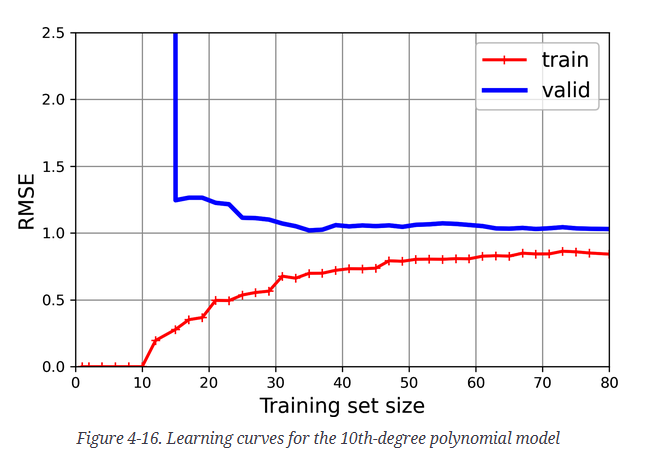

### Solutions:

- Regularization/simpler model/feature reduction techniques
- More data

## Underfitting

- No gap, just poor results

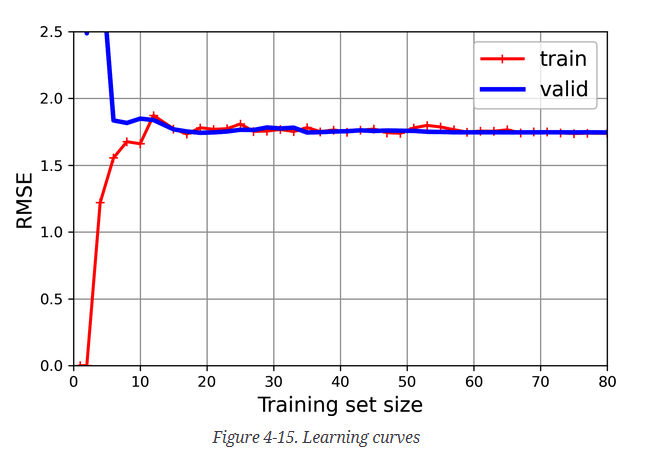


### Solutions:

- More complex model/more features
- Usually more data will not help

# Ridge Regression

- Let’s add a penalty to the cost function.
- Let’s add the square of the $l_2$ norm of the weights (except the intercept weight).
- $l_2$ norm is just the square root of the sum of the squares of each element and the square of that would be
    - 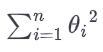

- Can just add $2\alpha\theta/n$ to the gradient vector (with a 0 for the first term) to calculate the gradient vector at each epoch 

- Notice we don’t include the intercept!!
- Multiply by $\alpha/n$ and add to the cost function to create a further penalty
    - 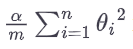

- Cost function becomes
    - 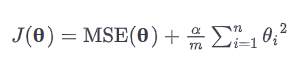

# Lasso Regression

- Let’s add a different penalty to the cost function.
- Let’s add the $l_1$ norm of the weights (except the intercept weight).
- $l_1$ norm is just the square root of the sum of the squares of each element or

    - 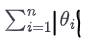

- Because the $l_1$ norm is not differentiable, we must amend our gradient vector slightly differently
    - 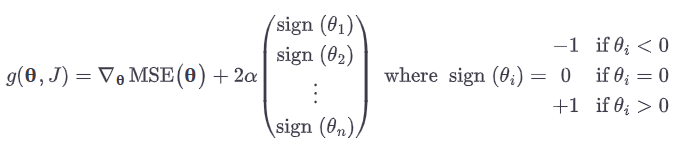
- Notice we don’t include the intercept!!
- Multiply by $2\alpha$ and add to the cost function to create a further penalty
    - 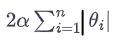

- Cost function becomes
    - 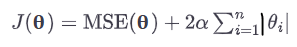
- Shrinks the weights to 0 and can be used for feature selection.

# Elastic Net

- Just a combination of ridge and lasso regression
- Use r to weight the ridge or lasso penalty.  Closer to 1 means lasso and closer to 0 means ridge

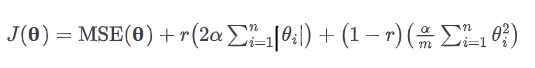

# Early Stopping

- Split train data into train and validation.
- Fit a model at each epoch and calculate the error on the validation data.
- Pick the weights of the model at the point before overfitting and where the validation error is the lowest.

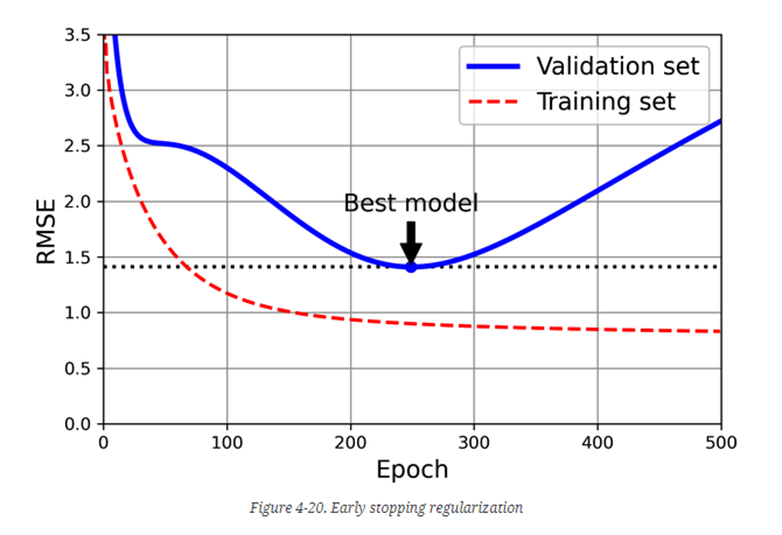

# Let's Do Our Own Version of SGD

In [187]:
# Create function to plot a line
def abline(slope, intercept, color='red', label=''):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', c=color, label=label)

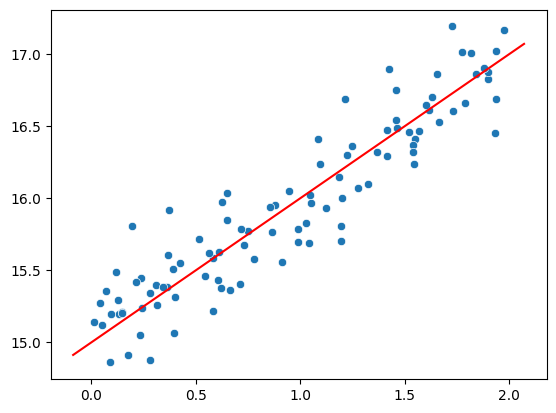

In [188]:
# Set up a random seed for reproducibility
np.random.seed(42)
# Number of rows
m = 100
# Set up actual slope and intercept values
actual_slope = 1
actual_intercept = 15
# Create X and y values
X = 2 * np.random.rand(m)
y = actual_intercept + X *actual_slope + np.random.randn(m) * 0.25
# Graph initial data and line
sns.scatterplot(x=X, y=y)
abline(actual_slope, actual_intercept)
plt.show()

In [189]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
reg = linear_regression.fit(X.reshape(-1,1),y)
print(reg.coef_,reg.intercept_)
# Get the best possible values
best_slope = reg.coef_[0]
best_intercept = reg.intercept_

[0.94252835] 15.05377403938669


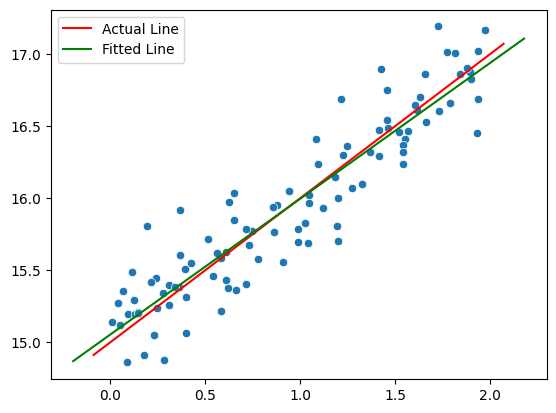

In [190]:
# Plot best fit line and line from original slope and intercept
# These will not be the same because of random variation
sns.scatterplot(x=X, y=y)
abline(actual_slope, actual_intercept, color='red', label='Actual Line')
abline(best_slope, best_intercept, color='green', label='Fitted Line')
plt.legend()
plt.show()

In [191]:
def gradient_descent(X, y, slope, intercept, epochs=100, learning_rate=0.01, batch_size=None, learning_rate_decay=None):

    line_history = []
    m = X.shape[0]
    # If no batch size, use the total data (full batch gradient descent)
    if not batch_size:
        batch_size = X.shape[0]

    for i in range(epochs):
        # Randomly choose m observations with replacement
        idx = np.random.choice(np.arange(m), size=batch_size, replace=False)
        Xi = X[idx]
        yi = y[idx]
        # Get the predicted values
        y_pred = slope*Xi + intercept
        line_history.append({'slope':slope, 'intercept':intercept, 'loss':np.sum((yi-y_pred)**2/batch_size)})
        # Calculate the derivative of the slope and intercept separately
        # If you were doing this with more than 2 weights, you would want to use the matrix representation of the gradient vector and not this
        slope_derivative = (-2/batch_size) * np.sum(Xi * (yi - y_pred))  # Derivative wrt m
        intercept_derivative = (-2/batch_size) * np.sum(yi - y_pred)  # Derivative wrt c
        # Update the weights
        slope = slope-learning_rate*slope_derivative
        intercept = intercept-learning_rate*intercept_derivative
        # Uncomment, if you want to decay the learning_rate
        if learning_rate_decay:
            learning_rate *= learning_rate_decay
    line_history.append({'slope':slope, 'intercept':intercept, 'loss':np.sum((yi-y_pred)**2/batch_size)})
    df = pd.DataFrame(line_history)
    return df

In [192]:
def get_loss(x, y, slope, intercept):
    # Short function to get the loss, assuming we only have 2 weights....will not work with more than 1 dimension
    return np.sum((y-(slope*x+intercept))**2)/x.shape[0]

def get_losses(X, y, actual_slope, actual_intercept, initial_slope, initial_intercept, buffer=10):
    # Create an array of values for graphing the loss
    # buffer and distance control the amount of space to graph on each side of the optimal values
    buffer = 10
    # Find the max distance between the actual slope and initial slope and the between the actual intercept and the initial intercept
    # This will give us the boundaries of where to graph the loss so we can see the initial slope and intercept and the actual slope and intercept
    dist = np.max([np.abs(actual_intercept-initial_intercept), np.abs(actual_slope-initial_slope)])
    # Create two vectors of potential slopes and intercepts.  These will be our inputs to our loss function to calculate all the possible values of loss
    p_slopes = np.arange(start=(actual_slope-dist-buffer), stop=(actual_slope+dist+buffer), step=0.5)
    p_intercepts = np.arange(start=(actual_intercept-dist-buffer), stop=(actual_intercept+dist+buffer), step=0.5)
    # Create a meshgrid of all possible slopes and intercepts
    xs, ys = np.meshgrid(p_intercepts, p_slopes)
    # Calculate the loss for all possible values
    losses = np.array([get_loss(X,y, slope, intercept) for intercept in p_intercepts for slope in p_slopes]).reshape(p_intercepts.shape[0], p_slopes.shape[0])
    return xs, ys, losses

In [193]:
def graph_losses_and_progress(sgd_results, xs, ys, losses, actual_slope, actual_intercept, initial_slope, initial_intercept, best_slope, best_intercept, ax, title=None, zoom=None):
    # Graph all possible values of loss for different levels of slope and intercept
    ax.contourf(xs, ys, losses, norm='log', levels=50, cmap=plt.cm.Reds)
    # Graph the values of slope and intercept as we find the optimal value of loss
    sns.lineplot(sgd_results, x='intercept', y='slope', ax=ax, sort=False, color='black', zorder=1)
    # Plot the initial values, actual values and best values
    print(initial_slope, initial_intercept)
    sns.scatterplot(x=[actual_intercept], y=[actual_slope], color='green', ax=ax, zorder=2, label='Original Parameters')
    sns.scatterplot(x=[best_intercept], y=[best_slope], color='blue', ax=ax, zorder=3, label='Fitted Parameters')
    sns.scatterplot(x=[initial_intercept], y=[initial_slope], color='black', ax=ax, zorder=4, label='Initial Parameters')
    ax.set_aspect('equal')
    if title:
        ax.set_title(title)
    if zoom:
        # Zoom in
        ax.set_xlim(actual_intercept-zoom, actual_intercept+zoom)
        ax.set_ylim(actual_slope-zoom, actual_slope+zoom)
    ax.legend()

In [194]:
def make_gif(filenames, fp_out):

    # use exit stack to automatically close opened images
    with contextlib.ExitStack() as stack:

        # lazily load images
        imgs = (stack.enter_context(Image.open(f))
                for f in filenames)

        # extract  first image from iterator
        img = next(imgs)

        # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
        img.save(fp=fp_out, format='GIF', append_images=imgs,
                save_all=True, duration=100, loop=20)

In [195]:
# Initialize slope and intercept

# Start with 0s
slope = 0
intercept = 0

# Uncomment if you want to initialize a different slope and intercept every time
# start_range = 10
# np.random.seed(int(time.time()))
# slope = np.random.randint(-start_range, start_range)
# intercept = np.random.randint(-start_range, start_range)

# Store the initial slope and intercept for later
initial_slope = slope
initial_intercept = intercept

# Let's leave an option for scaling as well
scaled = False
if scaled:

    # Refit the best slope and intercept for the scaled data
    std_sc = StandardScaler()
    X = std_sc.fit_transform(X.reshape(-1,1)).ravel()
    linear_regression = LinearRegression()
    reg = linear_regression.fit(X.reshape(-1,1),y)
    best_slope = reg.coef_[0]
    best_intercept = reg.intercept_
    mean = std_sc.mean_[0]
    std = std_sc.scale_[0]
    # We have to adjust our original slope and intercept based on the fitted mean and std
    actual_intercept = (actual_intercept+actual_slope*mean)
    actual_slope = (actual_slope*std)

sgd_results = gradient_descent(X, y, initial_slope, initial_intercept, epochs=1000, batch_size=m,learning_rate=0.1)
sgd_results

,slope,intercept,loss
0,0.000000,0.000000,254.448260
1,3.063953,3.188018,99.061305
2,4.771692,5.162188,44.763040
3,5.686421,6.420346,25.346714
4,6.138635,7.254837,17.996590
...,...,...,...
996,0.942528,15.053774,0.050412
997,0.942528,15.053774,0.050412
998,0.942528,15.053774,0.050412
999,0.942528,15.053774,0.050412


In [196]:
xs, ys, losses = get_losses(X, y, actual_slope, actual_intercept, initial_slope, initial_slope)

In [197]:
print(best_slope, best_intercept)
print(initial_slope, initial_intercept)
print(actual_slope, actual_intercept)

0.9425283466096211 15.05377403938669
0 0
1 15


0 0


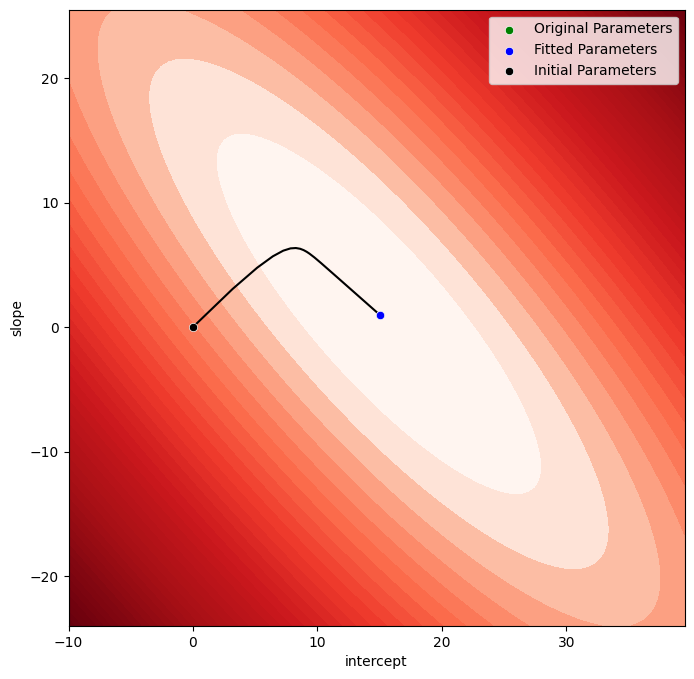

In [198]:
fig, ax = plt.subplots(figsize=(32,8))
graph_losses_and_progress(sgd_results, xs, ys, losses, actual_slope, actual_intercept, initial_slope, initial_intercept, best_slope, best_intercept, ax=ax)
plt.show()

In [199]:
scenario = 'test_batch_gradient_descent'
epochs = 10
learning_rate = 0.1
batch_size = m
outpath = Path(f'{scenario}_temp')
outpath.mkdir(parents=True, exist_ok=True)
filenames = []

sgd_results = gradient_descent(X, y, initial_slope, initial_intercept, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate)

for epoch in np.arange(start=1, stop=sgd_results.shape[0]):
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(32,8))
    graph_losses_and_progress(sgd_results.iloc[0:epoch], xs, ys, losses, actual_slope, actual_intercept, initial_slope, initial_intercept, best_slope, best_intercept, ax=ax0)
    graph_losses_and_progress(sgd_results.iloc[0:epoch], xs, ys, losses, actual_slope, actual_intercept, initial_slope, initial_intercept, best_slope, best_intercept, ax=ax1, zoom=2)
    sns.scatterplot(x=X, y=y, ax=ax2)
    abline(sgd_results.iloc[epoch,0], sgd_results.iloc[epoch,1], label='Current Line')
    abline(best_slope, best_intercept, color='green', label='Line of Best Fit')
    plt.tight_layout()
    scen_title = f'Gradient Descent\nTotal Rows: {m}\nBatch Size: {batch_size}\nEpoch: {epoch}\nLearning Rate: {learning_rate}'
    plt.suptitle(scen_title, y=1.1)
    plt.ylim(-1, max(y)+2)
    plt.legend()
    fn = outpath.joinpath(f'{scenario}_{epoch}.png')
    plt.savefig(fn, bbox_inches='tight')
    filenames.append(fn)
    plt.close()

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [200]:
fp_out = f"{scenario}.gif"
make_gif(filenames, fp_out)

# Let's Look at Different Regularization Techniques

In [201]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, add_dummy_feature
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Read in data on amount of gas pumped for the tonnage of a vehicle

In [202]:
df = pd.read_csv('gas0.csv', index_col=0)
df

,gas_pumped,vehicle_tons
0,4.863340,0.876393
1,5.221294,0.289274
2,5.753711,0.551745
5,7.491693,1.746046
6,8.953863,3.436751
...,...,...
209,8.276677,1.267911
210,11.561033,3.320541
211,6.285658,1.174349
214,3.344203,0.129916


In [203]:
# Going to downsample for illustration purposes
df = df.sample(n=20, random_state=42)
df

,gas_pumped,vehicle_tons
192,9.012933,3.037586
180,8.611575,2.008066
124,7.624183,1.795582
158,9.158680,2.636876
176,7.162991,1.313272
173,7.450144,1.889522
52,4.272429,0.334776
19,7.002699,1.088526
157,3.845650,0.290055
79,8.018104,2.255932


In [204]:
X = df[['vehicle_tons']]
y = df['gas_pumped']

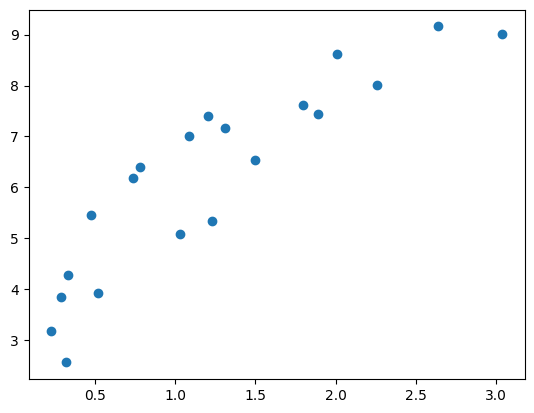

In [205]:
plt.scatter(df['vehicle_tons'], df['gas_pumped'])
plt.show()

In [206]:
n_poly = 10
poly = PolynomialFeatures(n_poly, include_bias=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [207]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [208]:
n_new = 5000
X_new = np.linspace(min(df['vehicle_tons'])-1, max(df['vehicle_tons'])+1, n_new).reshape(-1,1)
X_new_df = pd.DataFrame(X_new, columns=['vehicle_tons'])
X_new_scaled = scaler.transform(poly.transform(X_new_df))
y_pred_unregged = reg.predict(X_new_scaled)
y_pred_regged = ridge_reg.predict(X_new_scaled)

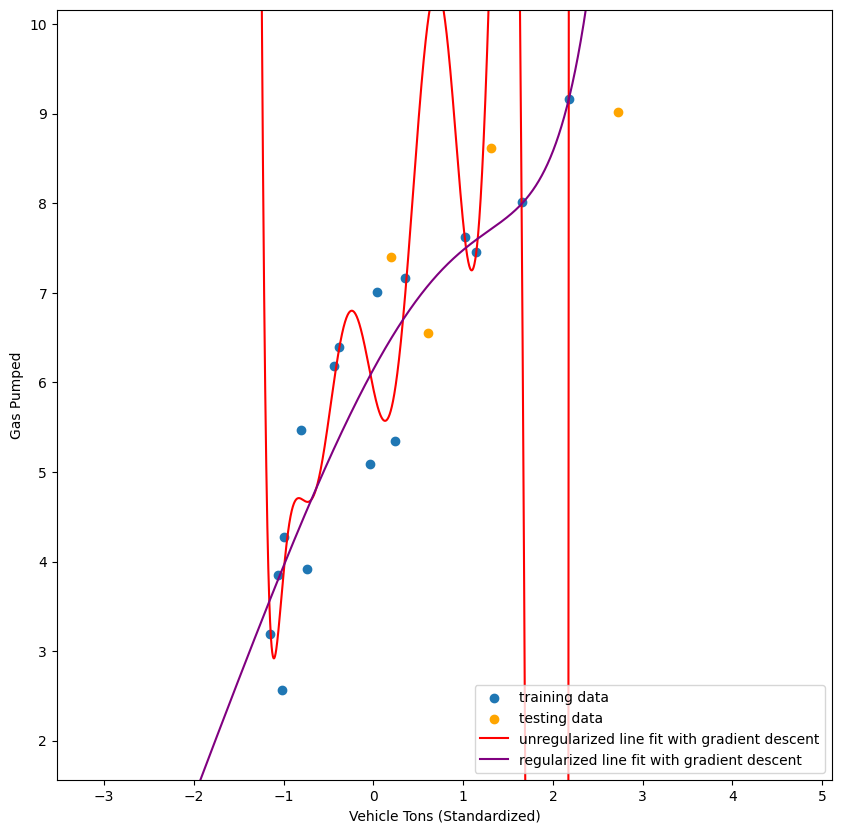

In [209]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_scaled[:, 0], y_train, label='training data')
plt.scatter(X_test_scaled[:, 0], y_test, c='orange', label='testing data')
plt.plot(X_new_scaled[:,0], y_pred_unregged, c='red', label='unregularized line fit with gradient descent')
plt.plot(X_new_scaled[:,0], y_pred_regged, c='purple', label='regularized line fit with gradient descent')
plt.xlim(min(X_new_scaled[:,0])-1, max(X_new_scaled[:,0])+1)
plt.ylim(min(y)-1, max(y)+1)
plt.xlabel('Vehicle Tons (Standardized)')
plt.ylabel('Gas Pumped')
plt.legend(loc = 'lower right')
plt.show()

In [210]:
y_pred_train_unregged = reg.predict(X_train_scaled)
y_pred_test_unregged = reg.predict(X_test_scaled)

y_pred_train_regged = ridge_reg.predict(X_train_scaled)
y_pred_test_regged = ridge_reg.predict(X_test_scaled)

In [211]:
print(f'Unregularized gradient descent solution train mean squared error: {mean_squared_error(y_train, y_pred_train_unregged)}')
print(f'Unregularized gradient descent solution test mean squared error: {mean_squared_error(y_test, y_pred_test_unregged)}')
print(f'Regularized gradient descent solution train mean squared error: {mean_squared_error(y_train, y_pred_train_regged)}')
print(f'Regularized gradient descent solution test mean squared error: {mean_squared_error(y_test, y_pred_test_regged)}')

Unregularized gradient descent solution train mean squared error: 0.3661147036640688
Unregularized gradient descent solution test mean squared error: 67776693.09950213
Regularized gradient descent solution train mean squared error: 0.5447398425909047
Regularized gradient descent solution test mean squared error: 6.549537140865745


In [212]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

lasso_reg.intercept_

5.792863880420886

In [213]:
lasso_reg.coef_

array([ 1.54484657,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

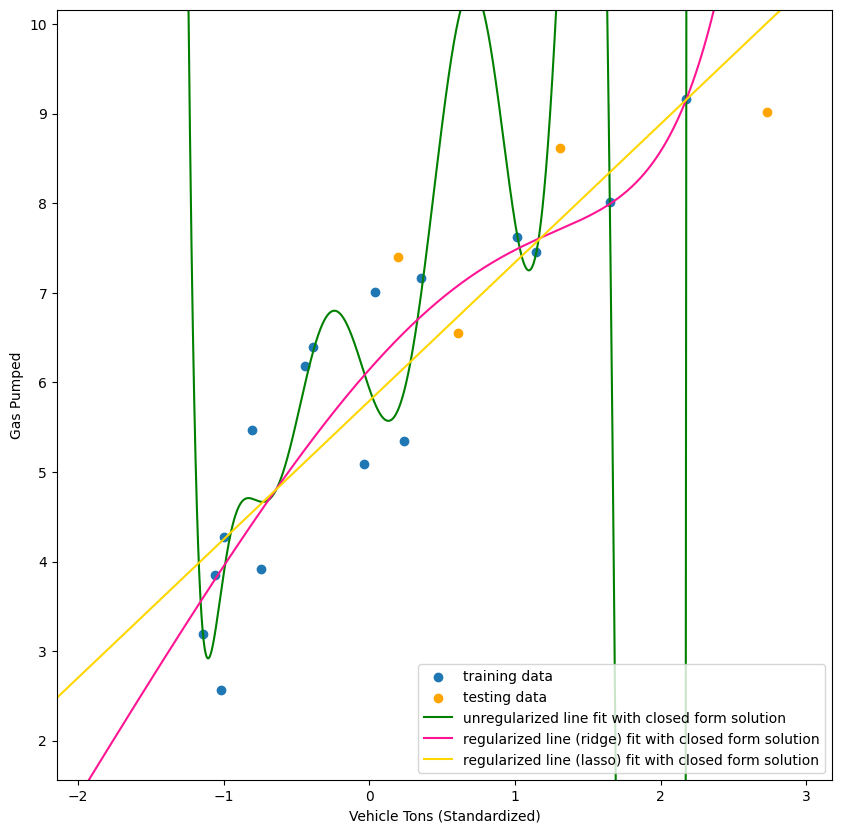

In [214]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_scaled[:, 0], y_train, label='training data')
plt.scatter(X_test_scaled[:, 0], y_test, c='orange', label='testing data')
plt.plot(X_new_scaled[:, 0], reg.predict(X_new_scaled), c='green', label='unregularized line fit with closed form solution')
plt.plot(X_new_scaled[:, 0], ridge_reg.predict(X_new_scaled), c='deeppink', label='regularized line (ridge) fit with closed form solution')
plt.plot(X_new_scaled[:, 0], lasso_reg.predict(X_new_scaled), c='gold', label='regularized line (lasso) fit with closed form solution')
plt.xlim(min(X_train_scaled[:, 0])-1, max(X_train_scaled[:, 0])+1)
plt.ylim(min(y)-1, max(y)+1)
plt.xlabel('Vehicle Tons (Standardized)')
plt.ylabel('Gas Pumped')
plt.legend(loc = 'lower right')
plt.show()

In [215]:
y_pred_train_regged_lasso_closed_form = lasso_reg.predict(X_train_scaled)
y_pred_test_regged_lasso_closed_form = lasso_reg.predict(X_test_scaled)

In [216]:
print(f'Unregularized closed form solution train mean squared error: {mean_squared_error(y_train, y_pred_train_unregged)}')
print(f'Unregularized closed form solution test mean squared error: {mean_squared_error(y_test, y_pred_test_unregged)}')
print(f'Regularized (ridge) closed form solution train mean squared error: {mean_squared_error(y_train, y_pred_train_regged)}')
print(f'Regularized (ridge) closed form solution test mean squared error: {mean_squared_error(y_test, y_pred_test_regged)}')
print(f'Regularized (lasso) closed form solution train mean squared error: {mean_squared_error(y_train, y_pred_train_regged_lasso_closed_form)}')
print(f'Regularized (lasso) closed form solution test mean squared error: {mean_squared_error(y_test, y_pred_test_regged_lasso_closed_form)}')

Unregularized closed form solution train mean squared error: 0.3661147036640688
Unregularized closed form solution test mean squared error: 67776693.09950213
Regularized (ridge) closed form solution train mean squared error: 0.5447398425909047
Regularized (ridge) closed form solution test mean squared error: 6.549537140865745
Regularized (lasso) closed form solution train mean squared error: 0.6700397451459232
Regularized (lasso) closed form solution test mean squared error: 0.8373620444753429


In [217]:
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_reg.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

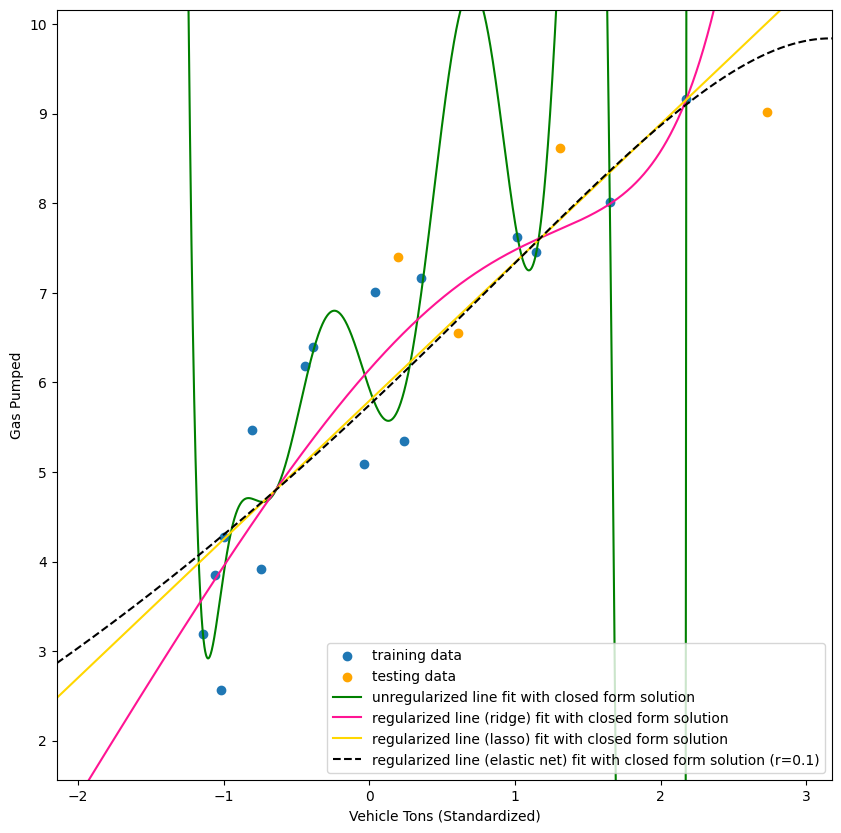

In [218]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_scaled[:, 0], y_train, label='training data')
plt.scatter(X_test_scaled[:, 0], y_test, c='orange', label='testing data')
plt.plot(X_new_scaled[:, 0], reg.predict(X_new_scaled), c='green', label='unregularized line fit with closed form solution')
plt.plot(X_new_scaled[:, 0], ridge_reg.predict(X_new_scaled), c='deeppink', label='regularized line (ridge) fit with closed form solution')
plt.plot(X_new_scaled[:, 0], lasso_reg.predict(X_new_scaled), c='gold', label='regularized line (lasso) fit with closed form solution')
plt.plot(X_new_scaled[:, 0], elastic_reg.predict(X_new_scaled), c='black', label='regularized line (elastic net) fit with closed form solution (r=0.1)', linestyle='dashed')
plt.xlim(min(X_train_scaled[:, 0])-1, max(X_train_scaled[:, 0])+1)
plt.ylim(min(y)-1, max(y)+1)
plt.xlabel('Vehicle Tons (Standardized)')
plt.ylabel('Gas Pumped')
plt.legend(loc = 'lower right')
plt.show()

In [219]:
y_pred_train_regged_elastic_closed_form = elastic_reg.predict(X_train_scaled)
y_pred_test_regged_elastic_closed_form = elastic_reg.predict(X_test_scaled)

In [220]:
print(f'Unregularized closed form solution train mean squared error: {mean_squared_error(y_train, y_pred_train_unregged)}')
print(f'Unregularized closed form solution test mean squared error: {mean_squared_error(y_test, y_pred_test_unregged)}')
print(f'Regularized (ridge) closed form solution train mean squared error: {mean_squared_error(y_train, y_pred_train_regged)}')
print(f'Regularized (ridge) closed form solution test mean squared error: {mean_squared_error(y_test, y_pred_test_regged)}')
print(f'Regularized (lasso) closed form solution train mean squared error: {mean_squared_error(y_train, y_pred_train_regged_lasso_closed_form)}')
print(f'Regularized (lasso) closed form solution test mean squared error: {mean_squared_error(y_test, y_pred_test_regged_lasso_closed_form)}')
print(f'Regularized (elastic) closed form solution train mean squared error: {mean_squared_error(y_train, y_pred_train_regged_elastic_closed_form)}')
print(f'Regularized (elastic) closed form solution test mean squared error: {mean_squared_error(y_test, y_pred_test_regged_elastic_closed_form)}')

Unregularized closed form solution train mean squared error: 0.3661147036640688
Unregularized closed form solution test mean squared error: 67776693.09950213
Regularized (ridge) closed form solution train mean squared error: 0.5447398425909047
Regularized (ridge) closed form solution test mean squared error: 6.549537140865745
Regularized (lasso) closed form solution train mean squared error: 0.6700397451459232
Regularized (lasso) closed form solution test mean squared error: 0.8373620444753429
Regularized (elastic) closed form solution train mean squared error: 0.7044851084016288
Regularized (elastic) closed form solution test mean squared error: 0.7211304995122358


In [221]:
step_size = 0.01
filenames = []
plt.ioff()
outpath = Path('tmp')
outpath.mkdir(parents=True, exist_ok=True)

for alpha_num, alpha in enumerate(np.arange(start=step_size, stop=1, step=step_size)):
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train_scaled, y_train)
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_scaled[:, 0], y_train, label='training data')
    plt.scatter(X_test_scaled[:, 0], y_test, c='orange', label='testing data')
    plt.plot(X_new_scaled[:, 0], reg.predict(X_new_scaled), c='green', label='unregularized line fit with closed form solution')
    plt.plot(X_new_scaled[:, 0], lasso_reg.predict(X_new_scaled), c='gold', label='regularized line (lasso) fit with closed form solution')
    plt.xlim(min(X_train_scaled[:, 0])-1, max(X_train_scaled[:, 0])+1)
    plt.ylim(min(y)-1, max(y)+1)
    plt.xlabel('Vehicle Tons (Standardized)')
    plt.ylabel('Gas Pumped')
    plt.legend(loc = 'lower right')

    plt.title(f'Lasso Regression Fit to Points\nAlpha={np.round(alpha,2):.2f}')

    plt.subplot(1,2,2)
    plt.axhline(0, color='black')
    ax = sns.barplot(x=['Intercept']+list(poly.get_feature_names_out()), y=[lasso_reg.intercept_]+list(lasso_reg.coef_))
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.title('Lasso Regression Weights')
    plt.ylim(-7,7)
    plt.xticks(rotation=90)

    fn = outpath.joinpath(f'lasso_{alpha}.png')
    plt.savefig(fn, bbox_inches='tight')
    filenames.append(fn)
    plt.close()

In [222]:
fp_out = f"lasso.gif"
make_gif(filenames, fp_out)

In [223]:
step_size = 0.01
filenames = []
plt.ioff()
outpath = Path('ridge_tmp')
outpath.mkdir(parents=True, exist_ok=True)

for alpha_num, alpha in enumerate(np.arange(start=step_size, stop=1, step=step_size)):
    ridge_reg = Ridge(alpha=alpha, max_iter=10000)
    ridge_reg.fit(X_train_scaled, y_train)
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_scaled[:, 0], y_train, label='training data')
    plt.scatter(X_test_scaled[:, 0], y_test, c='orange', label='testing data')
    plt.plot(X_new_scaled[:, 0], reg.predict(X_new_scaled), c='green', label='unregularized line fit with closed form solution')
    plt.plot(X_new_scaled[:, 0], ridge_reg.predict(X_new_scaled), c='deeppink', label='regularized line (ridge) fit with closed form solution')
    plt.xlim(min(X_train_scaled[:, 0])-1, max(X_train_scaled[:, 0])+1)
    plt.ylim(min(y)-1, max(y)+1)
    plt.xlabel('Vehicle Tons (Standardized)')
    plt.ylabel('Gas Pumped')
    plt.legend(loc = 'lower right')

    plt.title(f'Ridge Regression Fit to Points\nAlpha={np.round(alpha,2):.2f}')

    plt.subplot(1,2,2)
    plt.axhline(0, color='black')

    ax = sns.barplot(x=['Intercept']+list(poly.get_feature_names_out()), y=[ridge_reg.intercept_]+list(ridge_reg.coef_))
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.title('Ridge Regression Weights')
    plt.ylim(-7,7)
    plt.xticks(rotation=90)
    fn = f'ridge_tmp/ridge_{alpha}.png'
    fn = outpath.joinpath(f'ridge_{alpha}.png')
    plt.savefig(fn, bbox_inches='tight')
    filenames.append(fn)
    plt.close()

In [224]:
make_gif(filenames, "ridge.gif")

# Quiz Review

- What are the 4 parts to a machine learning algorithm (Al Gore Rhythm) that we discussed
- What is the form of a basic linear regression?  What function can we use to "vectorize" it?
- What are the two ways we can fit a bias (intercept) in our model with sklearn?
- What is the loss function for linear regression?
- What is "nice" about this loss function in the context of finding the minimum or best value?
- What does it mean that linear regression has a "closed-form solution" for the weights?
- What does R-squared represent?
	- What is SSTO?
	- What is SSR?
	- What is SSE?
- How might we interpret the coefficients of a linear regression?
- What do we have to consider when interpreting the coefficients in a multiple regression?  Why might this not be realistic?
- How do we find the minimum for our loss function?
- What is the basic process for using GD to find the best solution?
	- What is a partial derivative?
	- What is the gradient vector? What does it tell us?
	- What direction do we go when we have the gradient vector?
	- What is the basic update formula for updating the weights?
	- What is batch gradient descent?
	- What is stochastic gradient descent?
	- What is mini-batch gradient descent?
	- What does stochastic mean?
	- What is a learning rate?  How do we know the best learning rate? What is the effect of choosing different learning rates?
	- What are global and local minimums?  Does the loss function for linear regression have any local minimums?
	- Why do we need to scale our data when applying stochastic gradient descent?  Can you think of an example from our property data?
	
- Regularization
	- What is overfitting? Underfitting?
	- What is variance in our model?  Bias?
	- How do we know a model is over or underfitting?
	- What do we use to avoid overfitting?
	- What is ridge regression?
	- What is lasso regression?
	- What is elastic net regression?  What do different levels of r affect?  Value closer to 1 means?  Closer to 0 means?
	- What is early stopping?